In [10]:
# import python libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report


In [11]:
# import csv file
df = pd.read_csv('road accident data 2.csv', encoding= 'unicode_escape')

In [5]:
df.shape

(307973, 23)

In [6]:
df.head()

,ï»¿Accident_Index,Accident Date,Month,Year,Day_of_Week,Junction_Control,Junction_Detail,Accident_Severity,Latitude,Light_Conditions,...,Number_of_Casualties,Number_of_Vehicles,Police_Force,Road_Surface_Conditions,Road_Type,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200901BS70001,1/1/2021,Jan,2021,Thursday,Give way or uncontrolled,T or staggered junction,Serious,51.512273,Daylight,...,1,2,Metropolitan Police,Dry,One way street,30,15:11,Urban,Fine no high winds,Car
1,200901BS70002,1/5/2021,Jan,2021,Monday,Give way or uncontrolled,Crossroads,Serious,51.514399,Daylight,...,11,2,Metropolitan Police,Wet or damp,Single carriageway,30,10:59,Urban,Fine no high winds,Taxi/Private hire car
2,200901BS70003,1/4/2021,Jan,2021,Sunday,Give way or uncontrolled,T or staggered junction,Slight,51.486668,Daylight,...,1,2,Metropolitan Police,Dry,Single carriageway,30,14:19,Urban,Fine no high winds,Taxi/Private hire car
3,200901BS70004,1/5/2021,Jan,2021,Monday,Auto traffic signal,T or staggered junction,Serious,51.507804,Daylight,...,1,2,Metropolitan Police,Frost or ice,Single carriageway,30,8:10,Urban,Other,Motorcycle over 500cc
4,200901BS70005,1/6/2021,Jan,2021,Tuesday,Auto traffic signal,Crossroads,Serious,51.482076,Darkness - lights lit,...,1,2,Metropolitan Police,Dry,Single carriageway,30,17:25,Urban,Fine no high winds,Car


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307973 entries, 0 to 307972
Data columns (total 23 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ï»¿Accident_Index           307973 non-null  object 
 1   Accident Date               307973 non-null  object 
 2   Month                       307973 non-null  object 
 3   Year                        307973 non-null  int64  
 4   Day_of_Week                 307973 non-null  object 
 5   Junction_Control            307973 non-null  object 
 6   Junction_Detail             307973 non-null  object 
 7   Accident_Severity           307973 non-null  object 
 8   Latitude                    307973 non-null  float64
 9   Light_Conditions            307973 non-null  object 
 10  Local_Authority_(District)  307973 non-null  object 
 11  Carriageway_Hazards         5424 non-null    object 
 12  Longitude                   307973 non-null  float64
 13  Number_of_Casu

In [12]:
df.describe()

,Year,Latitude,Longitude,Number_of_Casualties,Number_of_Vehicles,Speed_limit
count,307973.000000,307973.000000,307973.000000,307973.000000,307973.000000,307973.000000
mean,2021.468934,52.487005,-1.368884,1.356882,1.829063,38.866037
std,0.499035,1.339011,1.356092,0.815857,0.710477,14.032933
min,2021.000000,49.914488,-7.516225,1.000000,1.000000,10.000000
25%,2021.000000,51.485248,-2.247937,1.000000,1.000000,30.000000
50%,2021.000000,52.225943,-1.349258,1.000000,2.000000,30.000000
75%,2022.000000,53.415517,-0.206810,1.000000,2.000000,50.000000
max,2022.000000,60.598055,1.759398,48.000000,32.000000,70.000000


# DATA CLEANING

In [16]:
import pandas as pd

# Load the dataset
df = pd.read_csv('road accident data 2.csv')

# Basic Cleaning
df.dropna(inplace=True)                    # Remove rows with missing values
df.drop_duplicates(inplace=True)           # Remove duplicate rows
df.columns = df.columns.str.strip()        # Remove whitespace from column names

# Save cleaned data
df.to_csv('cleaned_road_accident_data.csv', index=False)


In [18]:
df.drop(columns=[
    'Service_year_of_vehicle', 'Defect_of_vehicle',
    'Work_of_casuality', 'Fitness_of_casuality'
], inplace=True, errors='ignore')


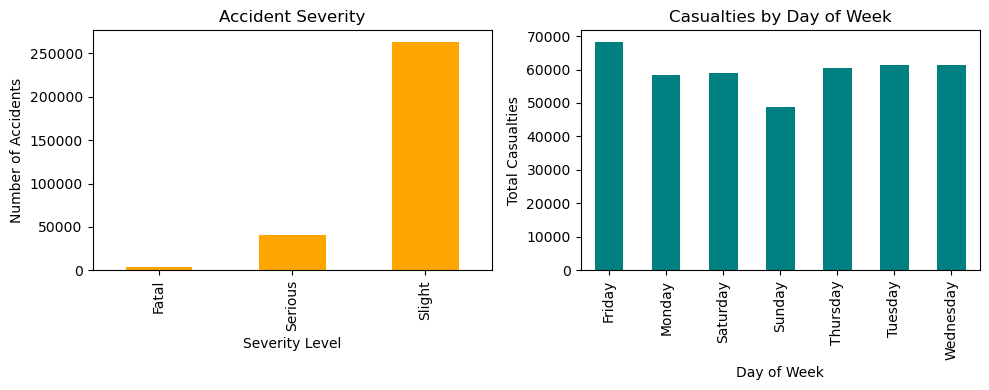

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))

# Plot 1: Accident Severity
plt.subplot(1, 2, 1)
df['Accident_Severity'].value_counts().sort_index().plot(kind='bar', color='orange')
plt.title('Accident Severity')
plt.xlabel('Severity Level')
plt.ylabel('Number of Accidents')

# Plot 2: Number of Casualties per Day of Week
plt.subplot(1, 2, 2)
df.groupby('Day_of_Week')['Number_of_Casualties'].sum().sort_index().plot(kind='bar', color='teal')
plt.title('Casualties by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Total Casualties')

plt.tight_layout()
plt.show()


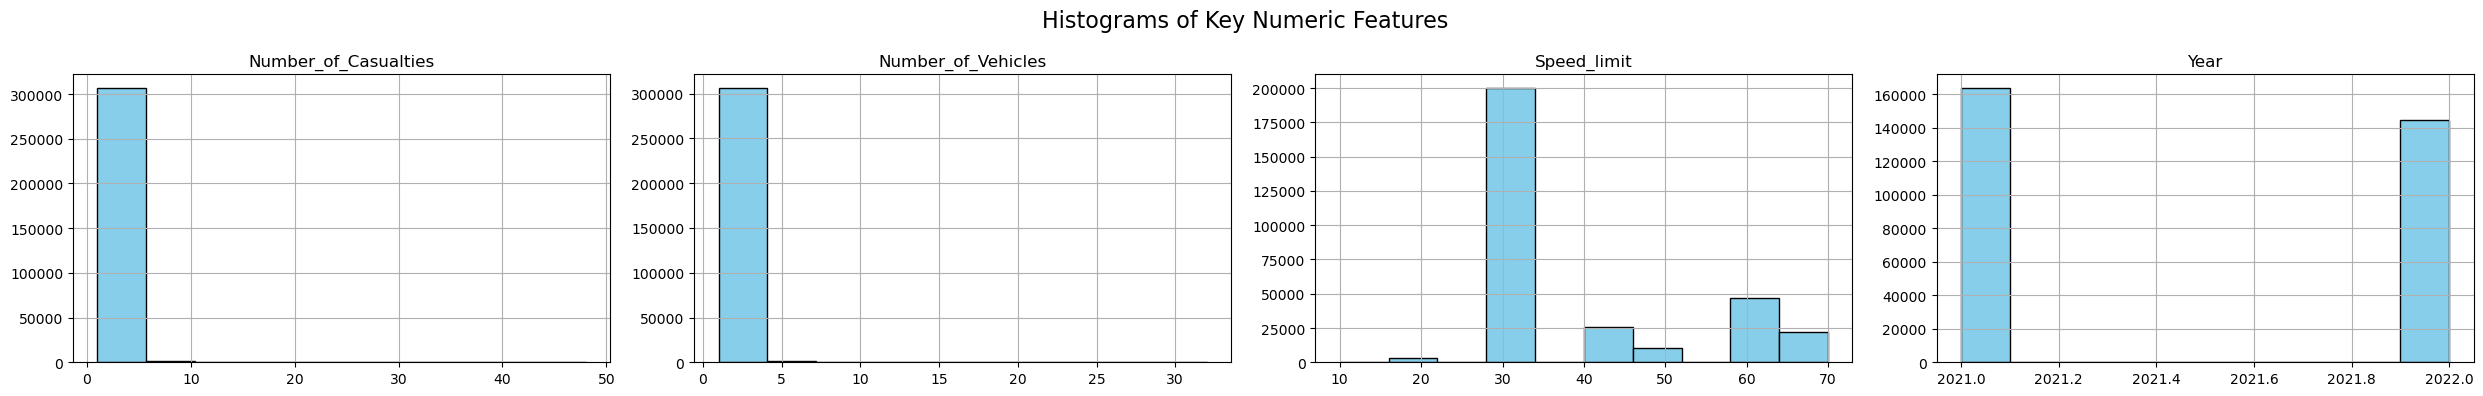

In [22]:
import matplotlib.pyplot as plt

# Choose 4 numeric columns to display
df[['Number_of_Casualties', 'Number_of_Vehicles', 'Speed_limit', 'Year']].hist(layout=(1, 4), figsize=(25, 4), color='skyblue', edgecolor='black')
plt.suptitle('Histograms of Key Numeric Features', fontsize=16)
plt.tight_layout()
plt.show()


#  Exploratory Data Analysis (EDA)


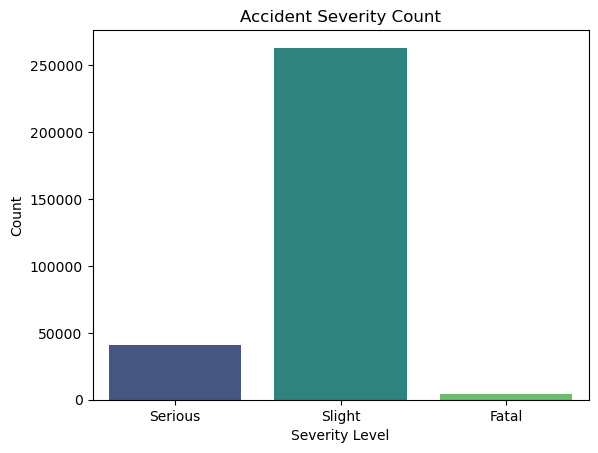

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('road accident data 2.csv')
df.columns = df.columns.str.strip()  # Clean column names

# Now plot the countplot
sns.countplot(data=df, x='Accident_Severity', hue='Accident_Severity', palette='viridis', legend=False)

plt.title('Accident Severity Count')
plt.xlabel('Severity Level')
plt.ylabel('Count')
plt.show()


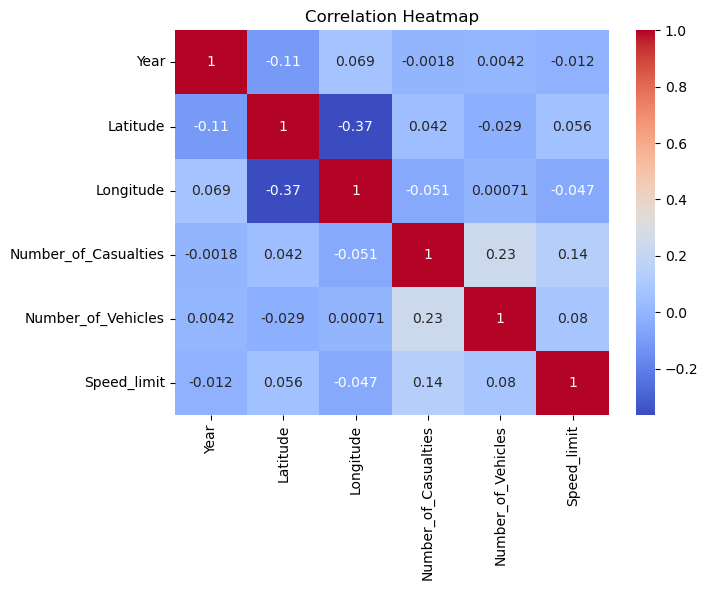

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Load the CSV file (make sure it's in the working directory)
df = pd.read_csv('road accident data 2.csv')

# Step 2: Clean column names (remove extra spaces)
df.columns = df.columns.str.strip()

# Step 3: Select only numeric columns
numeric_df = df.select_dtypes(include='number')

# Step 4: Check if numeric columns exist
if not numeric_df.empty:
    # Step 5: Plot correlation heatmap
    plt.figure(figsize=(7, 5))
    sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
    plt.title('Correlation Heatmap')
    plt.show()
else:
    print("No numeric columns found in the dataset.")


Index(['Accident_Index', 'Accident Date', 'Month', 'Year', 'Day_of_Week',
       'Junction_Control', 'Junction_Detail', 'Accident_Severity', 'Latitude',
       'Light_Conditions', 'Local_Authority_(District)', 'Carriageway_Hazards',
       'Longitude', 'Number_of_Casualties', 'Number_of_Vehicles',
       'Police_Force', 'Road_Surface_Conditions', 'Road_Type', 'Speed_limit',
       'Time', 'Urban_or_Rural_Area', 'Weather_Conditions', 'Vehicle_Type'],
      dtype='object')


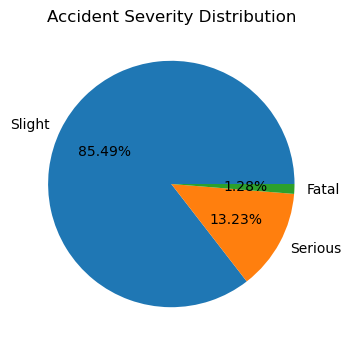

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load the dataset
df = pd.read_csv('road accident data 2.csv')
df.columns = df.columns.str.strip()  # Clean column names

# Step 2: Check actual column names
print(df.columns)  # Optional: see all columns to confirm correct spelling

# Step 3: Plot pie chart if 'Accident_Severity' column exists
if 'Accident_Severity' in df.columns:
    plt.figure(figsize=(6, 4))
    plt.pie(x=df['Accident_Severity'].value_counts().values,
            labels=df['Accident_Severity'].value_counts().index,
            autopct='%2.2f%%')
    plt.title('Accident Severity Distribution')
    plt.show()
else:
    print("Column 'Accident_Severity' not found in the dataset.")


# Decision Tree Model - Accident Severity

In [9]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
df = pd.read_csv("road accident data 2.csv")
df.columns = df.columns.str.strip()  # Clean column names

# Optional: check available columns
# print(df.columns)

# Drop rows with missing target values (if any)
df = df.dropna(subset=['Accident_Severity'])

# Encode categorical features
label_encoders = {}
df_encoded = df.copy()

for col in df_encoded.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le

# Define features and target
X = df_encoded.drop(columns=['Accident_Severity'])
y = df_encoded['Accident_Severity']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = dt_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7494371807082865
Classification Report:
               precision    recall  f1-score   support

           0       0.06      0.07      0.06      1215
           1       0.17      0.19      0.18     12142
           2       0.86      0.85      0.86     79035

    accuracy                           0.75     92392
   macro avg       0.36      0.37      0.37     92392
weighted avg       0.76      0.75      0.76     92392



#  Decision Tree Model - Predicting Time

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load your dataset
df = pd.read_csv("road accident data 2.csv")
df.columns = df.columns.str.strip()  # Clean column names

# Drop rows with missing Time values
df = df.dropna(subset=['Time'])

# Encode categorical columns
df_encoded = df.copy()
label_encoders = {}

for col in df_encoded.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le

# Define features and target
X = df_encoded.drop(columns=['Time'])
y = df_encoded['Time']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train Decision Tree model
clf = DecisionTreeClassifier(random_state=42, max_depth=5, max_leaf_nodes=10)
clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%')
print(classification_report(y_test, y_pred))


Accuracy: 1.51%


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        83
           1       0.00      0.00      0.00        15
           2       0.00      0.00      0.00        12
           3       0.00      0.00      0.00        10
           4       0.00      0.00      0.00        59
           5       0.00      0.00      0.00         8
           6       0.00      0.00      0.00        11
           7       0.00      0.00      0.00        12
           8       0.00      0.00      0.00         9
           9       0.00      0.00      0.00        60
          10       0.00      0.00      0.00         6
          11       0.00      0.00      0.00         5
          12       0.00      0.00      0.00        10
          13       0.00      0.00      0.00         4
          14       0.00      0.00      0.00        52
          15       0.00      0.00      0.00         7
          16       0.00      0.00      0.00         7
          17       0.00    

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


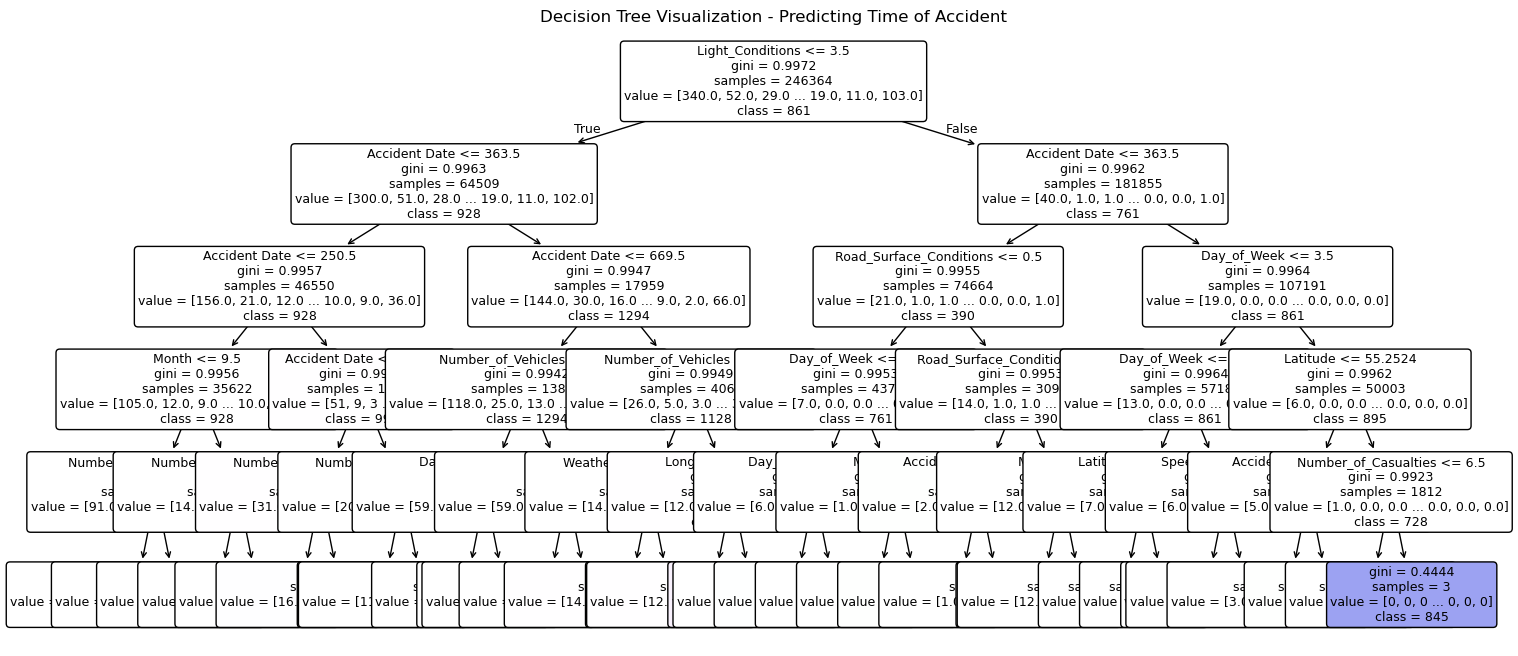

In [31]:
# Get number of target classes from model
n_classes = clf.n_classes_

# Create class names list of correct length
class_names = [str(i) for i in range(n_classes)]

# Plot tree with valid class names
plt.figure(figsize=(17, 8))
plot_tree(clf,
          filled=True,
          feature_names=X.columns,
          class_names=class_names,
          rounded=True,
          fontsize=9,
          precision=4)
plt.title("Decision Tree Visualization - Predicting Time of Accident")
plt.show()


# Save Processed Dataset

In [35]:
target_column = 'Accident_severity'


In [36]:
print(df.columns.tolist())


['Accident_Index', 'Accident Date', 'Month', 'Year', 'Day_of_Week', 'Junction_Control', 'Junction_Detail', 'Accident_Severity', 'Latitude', 'Light_Conditions', 'Local_Authority_(District)', 'Carriageway_Hazards', 'Longitude', 'Number_of_Casualties', 'Number_of_Vehicles', 'Police_Force', 'Road_Surface_Conditions', 'Road_Type', 'Speed_limit', 'Time', 'Urban_or_Rural_Area', 'Weather_Conditions', 'Vehicle_Type']


# Visualization: Precision and Recall

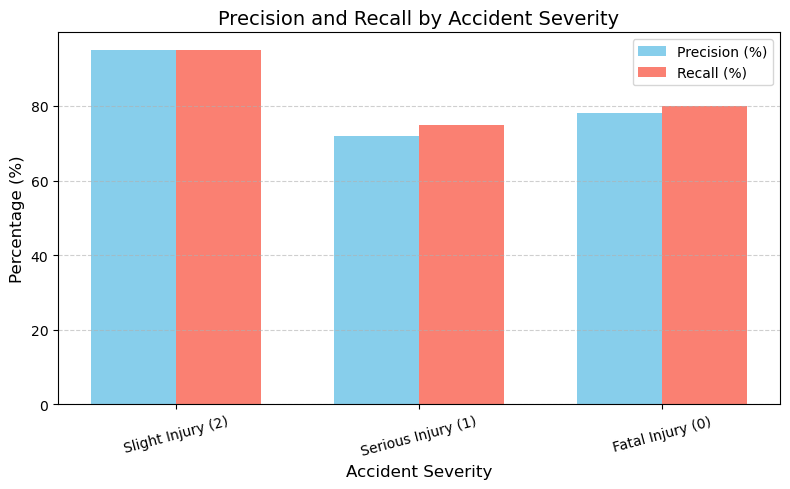

In [38]:
import matplotlib.pyplot as plt

# Data for the chart
categories = ['Slight Injury (2)', 'Serious Injury (1)', 'Fatal Injury (0)']
precision = [95, 72, 78]  # Precision for each category
recall = [95, 75, 80]     # Recall for each category

# Set up bar width and positions
bar_width = 0.35
index = range(len(categories))

# Create the plot
plt.figure(figsize=(8, 5))
plt.bar(index, precision, bar_width, label='Precision (%)', color='skyblue')
plt.bar([i + bar_width for i in index], recall, bar_width, label='Recall (%)', color='salmon')

# Add labels and formatting
plt.xlabel('Accident Severity', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.title('Precision and Recall by Accident Severity', fontsize=14)
plt.xticks([i + bar_width / 2 for i in index], categories, rotation=15)
plt.legend()
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Show the plot
plt.show()


# Visualization: Accidents by Hour

C:\Users\hp\AppData\Local\Temp\ipykernel_2328\3525296784.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time'] = pd.to_datetime(df['Time'], errors='coerce').dt.hour


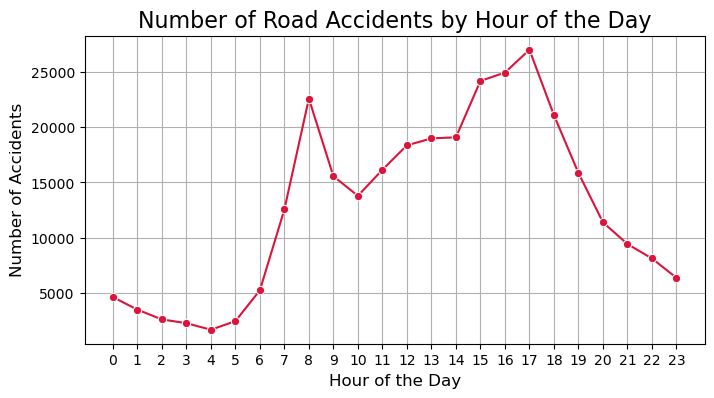

In [45]:
df = pd.read_csv(r"C:\Users\hp\Downloads\jupyter project\road accident data 2.csv")  # Replace with your dataset path
df['Time'] = pd.to_datetime(df['Time'], errors='coerce').dt.hour

# Count accidents by hour
accidents_by_hour = df['Time'].value_counts().sort_index()

# Line chart
plt.figure(figsize=(8, 4))
sns.lineplot(x=accidents_by_hour.index, y=accidents_by_hour.values, marker='o', color='crimson')
plt.xticks(range(0, 24))
plt.title('Number of Road Accidents by Hour of the Day', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)
plt.grid(True)
plt.show()